In [1]:
# Import the Natural Language Toolkit (nltk) for natural language processing tasks.
import nltk

# Import specific components from nltk for handling stopwords.
# Stopwords are common words that are often filtered out before processing text.
from nltk.corpus import stopwords

# Import pandas for data manipulation and analysis.
import pandas as pd

# Import NumPy for numerical operations with arrays and matrices.
import numpy as np

# Import shuffle from sklearn.utils to randomly shuffle a collection or list.
from sklearn.utils import shuffle

# Import literal_eval from ast to safely evaluate a string containing a Python literal or container.
from ast import literal_eval

# Import pyplot from matplotlib for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Import wordcloud to generate a visual representation of text data where the size of each word indicates its frequency or importance.
import wordcloud

# Import re module for regular expression operations.
# Regular expressions are used for pattern matching in text.
import re




In [2]:
def read_data(filepath):
    # Load data from a CSV file at the given filepath using pandas.
    # The function reads the CSV into a DataFrame, which is a 2-dimensional
    # labeled data structure with columns of potentially different types.
    data = pd.read_csv(filepath)
    
    # Return the loaded data as a DataFrame.
    return data


In [3]:
# Call the read_data function with the filepath 'data/bbc_data.csv'.
# This function is expected to read a CSV file from the specified path and return the data as a pandas DataFrame.
# The returned DataFrame is stored in the variable 'data'.
data = read_data('data/bbc_data.csv')


In [4]:
# Assuming 'data' is a pandas DataFrame that has been loaded previously:
# This method displays the first 5 rows of the DataFrame by default.
# You can pass an integer to .head(n) where 'n' is the number of rows you want to display.
print(data.head())


                                                data         labels
0  Musicians to tackle US red tape  Musicians gro...  entertainment
1  U2s desire to be number one  U2, who have won ...  entertainment
2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
3  Snicket tops US box office chart  The film ada...  entertainment
4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment


In [5]:
# Access the 'labels' column from the DataFrame 'data'.
# The .values attribute then extracts the values of this column as a NumPy array.
data['labels'].values

array(['entertainment', 'entertainment', 'entertainment', ..., 'tech',
       'tech', 'tech'], dtype=object)

In [6]:
# Shuffle and split the 'data' DataFrame into training, validation, and test sets.
# The .sample(frac=1, random_state=50) shuffles the entire DataFrame 'data'. The 'frac=1' means to return 100% of the data, but shuffled.
# The 'random_state' parameter ensures the shuffle is reproducible; using the same seed number (50) will yield the same shuffled order each time.
# The np.split function is then used to divide the shuffled data into segments:
# [int(.6*len(data),), int(.85*len(data))] specifies the indices at which to split the data:
# - int(.6*len(data)) marks the point to split the data for the training set (60% of the data).
# - int(.85*len(data)) marks the point to split the remaining data for the validation set (25% of the data, making a total of 85% leaving the last 15% for testing).
train, valid, test = np.split(data.sample(frac=1, random_state=50), \
                              [int(.6*len(data)), int(.85*len(data))])


/Users/mikosa/nlp/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
# Print the shape of the 'train' DataFrame. 
# The .shape attribute returns a tuple representing the dimensions of the DataFrame,
# where the first number is the number of rows and the second number is the number of columns.
print(train.shape)

# Print the shape of the 'valid' (validation) DataFrame.
# This will show how many rows and columns are in the validation set.
print(valid.shape)

# Print the shape of the 'test' DataFrame.
# This output will help verify the size of the test set, confirming it's about 15% of the original data as expected.
print(test.shape)



(1335, 2)
(556, 2)
(334, 2)


In [8]:
# Access the 'labels' column from the 'train' DataFrame.
# The .values attribute then extracts the values of this column as a NumPy array.
# This array will contain the labels associated with each row in the training data,
# which can be used for training machine learning models.
train['labels'].values

array(['business', 'sport', 'politics', ..., 'business', 'entertainment',
       'tech'], dtype=object)

In [9]:
# Split the 'train' DataFrame into features and labels.
# 'x_train' contains the features from the 'data' column of the 'train' DataFrame,
# and 'y_train' contains the labels from the 'labels' column.
# These will be used to train the machine learning model.
x_train, y_train = train['data'].values, train['labels'].values

# Split the 'valid' (validation) DataFrame into features and labels.
# 'x_val' contains the features from the 'data' column of the 'valid' DataFrame,
# and 'y_val' contains the labels from the 'labels' column.
# These will be used to validate the model during the training process to tune parameters and prevent overfitting.
x_val, y_val = valid['data'].values, valid['labels'].values

# Split the 'test' DataFrame into features and labels.
# 'x_test' contains the features from the 'data' column of the 'test' DataFrame,
# and 'y_test' contains the labels from the 'labels' column.
# These will be used to test the model after training to evaluate its performance on unseen data.
x_test, y_test = test['data'].values, test['labels'].values


In [11]:

# Regular expression patterns to replace certain characters with spaces.
replace_space = re.compile('[/(){}\[\]\|@,;#+-]')

# Regular expression pattern to remove any character that is not a digit or lowercase letter.
bad_word = re.compile("[^0-9a-z]")

# Set of English stopwords.
stopword = set(stopwords.words('english'))

def prepare_text(text):
    # Convert all characters in the text to lowercase to standardize it.
    text = text.lower()

    # Replace specified punctuation and symbols with spaces.
    text = replace_space.sub(' ', text)

    # Remove all characters that are not digits or lowercase letters.
    text = bad_word.sub(' ', text)

    # Split the text into words and rejoin words not in the stopwords list.
    # This step removes unnecessary common words like 'the', 'is', etc., which do not add significant meaning in text analysis.
    text = " ".join(word for word in text.split() if word not in stopword)

    # Return the cleaned and processed text.
    return text


In [12]:
# Apply the prepare_text function to each text entry in x_train.
# This line iterates over each item in x_train, processes the text using prepare_text, and stores the results back in x_train.
x_train = [prepare_text(x) for x in x_train]

# Similarly, apply the prepare_text function to each text entry in x_test.
# This processing step is essential for maintaining consistency in how text data is handled between training and testing datasets.
x_test = [prepare_text(x) for x in x_test]

# Apply the prepare_text function to each text entry in x_val.
# Just like with training and testing, this ensures the validation data is also processed and ready for any machine learning or analysis tasks.
x_val = [prepare_text(x) for x in x_val]


In [14]:
# Initialize dictionaries to store counts of each label and word.
words_count = {}
label_count = {}

# Loop through each label in the training labels (y_train).
for labels in y_train:
    # If the label is already in the dictionary, increment its count by 1.
    if labels in label_count:
        label_count[labels] += 1
    else:
        # If the label is not in the dictionary, add it with a count of 1.
        label_count[labels] = 1

# Loop through each document in the training data (x_train).
for words in x_train:
    # Split the document into individual words.
    for word in words.split():
        # If the word is already in the dictionary, increment its count by 1.
        if word in words_count:
            words_count[word] += 1
        else:
            # If the word is not in the dictionary, add it with a count of 1.
            words_count[word] = 1

# Sort the label counts in descending order and select the labels.
top_labels = sorted(label_count.items(), key=lambda x: x[1], reverse=True)
top_labels_name = [label[0] for label in top_labels]

# Sort the word counts in descending order and get the top three words.
top_words = sorted(words_count.items(), key=lambda x: x[1], reverse=True)[:3]
top_words_name = [word[0] for word in top_words]

# Join the top labels and words into strings.
label_output = ','.join(top_labels_name)
word_output = ','.join(top_words_name)

# Print the top words and labels.
print(f'Top Words: {word_output}')
print(f'Top Labels: {label_output}')


Top Words: said,mr,would
Top Labels: business,sport,politics,tech,entertainment


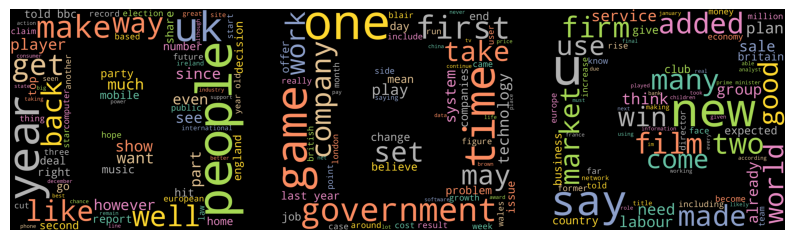

In [15]:
from wordcloud import ImageColorGenerator
from PIL import Image

bbc_mask = np.array(Image.open('data/image/BBC.jpeg'))
text  = " ".join(text for text in x_train)
color = ImageColorGenerator(bbc_mask)
additional_stopwords = {'called', 'would', 'mr', 'help', 'look', 'also', \
                        'put', 'move', 'said', 'going', 'despite', 'still', 'used', 'could'}

# Update the default set of stopwords with your additional words
stopword.update(additional_stopwords)


def bbc_news_wordcloud(data, mask=None):
    cloud = wordcloud.WordCloud(scale=3,
                      mask=mask,
                      colormap='Set2', 
                      background_color='black',
                      stopwords=stopword,
                      collocations=True,
                      contour_color='black',
                      contour_width=1).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    # plt.title(title, fontsize = 30)
    plt.show()


bbc_news_wordcloud(text, bbc_mask)

In [17]:
# Sort the words by their frequency count in descending order.
top_words = sorted(words_count.items(), key=lambda x: x[1], reverse=True)
# Select the top 10,000 most frequent words to use in the bag-of-words model.
top_10k_words = [word for word, _ in top_words][:10000]

# Define the size of the dictionary to be used for the bag-of-words vector.
dict_size = 10000
# Create a dictionary mapping each word to a unique index based on its frequency rank.
word_2_index = {word: i for i, word in enumerate(top_10k_words)}
# Create a reverse dictionary mapping each index back to its corresponding word.
index_2_word = {i: word for i, word in enumerate(top_10k_words)}
# List all words that have been indexed (redundant but can be useful for checks).
all_word = word_2_index.keys()

def my_bag_of_words(text, word_2_index, dict_size):
    # Initialize a vector of zeros with a length equal to the dictionary size.
    result_vectors = np.zeros(dict_size)
    # Split the input text into words and check each word.
    for word in text.split():
        # If the word exists in our dictionary, set the corresponding vector entry to 1.
        if word in word_2_index:
            result_vectors[word_2_index[word]] = 1
    # Return the resultant vector, which is a sparse representation of the text.
    return result_vectors


In [18]:
def test_my_bag_of_words():
    # Define a dictionary for word to index mapping.
    word_2_index = {'hello': 0, 'my': 1, 'name': 2, 'is': 3, 'michael': 4}
    
    # List of examples to test.
    examples = ['hello his name is Paul']
    # List of expected answers.
    answers = [[1, 0, 1, 1, 0]]

    # Iterate through each example and its corresponding expected answer.
    for example, answer in zip(examples, answers):
        # Convert the expected answer to a numpy array for comparison.
        answer = np.array(answer)
        # Test if the function's output matches the expected answer.
        if (my_bag_of_words(example, word_2_index, 5) != answer).any():
            # Return a failure message with the specific case if a mismatch occurs.
            return f"Wrong Answer for case: '{example}'"
    
    # Return success message if all tests pass.
    return 'Basic Test Passed'




In [19]:
# Call the test function to verify functionality.
print(test_my_bag_of_words())

Basic Test Passed


In [20]:
from scipy import sparse as sp_sparse

# Convert each document in x_train into a sparse matrix of features using the bag-of-words model,
# then vertically stack all these sparse matrices into a single sparse matrix.
x_train_bag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, word_2_index, dict_size)) for text in x_train])

# Repeat the above process for the x_test dataset.
x_test_bag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, word_2_index, dict_size)) for text in x_test])

# Repeat the above process for the x_val dataset.
x_val_bag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, word_2_index, dict_size)) for text in x_val])


In [21]:
x_train_bag

<1335x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 201055 stored elements in Compressed Sparse Row format>

In [22]:
label_count

{'business': 315,
 'sport': 275,
 'politics': 260,
 'entertainment': 235,
 'tech': 250}

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder.
mlb = LabelEncoder()

# Fit the LabelEncoder to the unique labels found in your data.
# The 'sorted(label_count.keys())' ensures that the labels are sorted before encoding.
# This step is crucial as it determines the mapping from label names to integers.
mlb.fit(sorted(label_count.keys()))

# Transform the labels in y_train into integers using the fitted LabelEncoder.
y_train = mlb.transform(y_train)

# Transform the labels in y_val into integers using the fitted LabelEncoder.
y_val = mlb.transform(y_val)


In [24]:
label_count.keys()

dict_keys(['business', 'sport', 'politics', 'entertainment', 'tech'])

In [25]:
y_train

array([0, 3, 2, ..., 0, 1, 4])

In [26]:
from sklearn.linear_model import LogisticRegression

def train_classifier(x_train, y_train):
    # Initialize the Logistic Regression classifier.
    clf = LogisticRegression()

    # Fit the model with the training data. This trains the classifier to understand the relationship
    # between the input features (x_train) and the target labels (y_train).
    clf = clf.fit(x_train, y_train)

    # Return the trained model.
    return clf


In [27]:
# Train a logistic regression classifier using the bag-of-words representations of your training data.
# 'x_train_bag' contains the sparse feature vectors for each document in your training set,
# while 'y_train' contains the numerical labels derived from your LabelEncoder.
classifier_bag = train_classifier(x_train_bag, y_train)


In [28]:
# Using the trained classifier 'classifier_bag' to predict the labels of the validation dataset 'x_val_bag'.
# The 'predict' function will output the most likely label for each example in 'x_val_bag'.
y_val_pred = classifier_bag.predict(x_val_bag)

# The 'decision_function' computes the confidence scores for each class for each example in 'x_val_bag'.
# These scores represent the distance of the samples to the hyperplane which separates the classes.
y_val_score = classifier_bag.decision_function(x_val_bag)


In [29]:
# Convert the predicted numerical labels back to their original categorical labels.
# 'y_val_pred' contains the numerical labels predicted by the classifier for the validation data.
y_pred_inverse = mlb.inverse_transform(y_val_pred)

# Convert the true numerical labels back to their original categorical labels.
# 'y_val' contains the true numerical labels for the validation data.
y_val_inverse = mlb.inverse_transform(y_val)


In [30]:
# Loop through the first four entries of the validation set.
for i in range(4): 
    # Print the text data, true label, and predicted label for each entry.
    # This format makes it easy to visually compare the predicted labels with the true labels.
    print('Text:\t{}\n True label:\t {}\n Predicted label:\t{}\n\n'\
          .format(x_val[i], y_val_inverse[i], y_pred_inverse[i]))


Text:	kelly trails new discipline power teachers could get powers remove unruly pupils classes zero tolerance drive education secretary ruth kelly suggested ms kelly told bbc progress made severely disruptive children parents still worried lower level problems minister also confirmed received spiritual support catholic movement opus dei denied faith meant would refuse key government jobs conservatives made school discipline one five priority areas run next general election ms kelly expected announce plans issue next fortnight told bbc ones breakfast frost really important support head teachers teachers tackling disruption classroom made huge progress really difficult cases pupils severely disruptive behaviour quite rightly teachers concerned parents concerned lower level disruption goes classroom tackled would like see teacher able remove disruptive children classroom completely either alternative provision within school indeed school may working together schools particular area provid

In [31]:
from sklearn.metrics import accuracy_score, f1_score

def print_evaluation_scores(y_val, predicted):
    # Print the accuracy of the predictions: the proportion of the total number of predictions that were correct.
    print(f"Accuracy Score: {accuracy_score(y_val, predicted)}")
    
    # Print the F1 score using 'macro' averaging:
    # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    print(f"F1 Score(Macro): {f1_score(y_val, predicted, average='macro')}")
    
    # Print the F1 score using 'micro' averaging:
    # Calculate metrics globally by counting the total true positives, false negatives, and false positives.
    print(f"F1 Score(Micro): {f1_score(y_val, predicted, average='micro')}")
    
    # Print the F1 score using 'weighted' averaging:
    # Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
    print(f"F1 Score(Weighted): {f1_score(y_val, predicted, average='weighted')}")


In [32]:
# Assuming y_val and y_val_pred are already defined:
print_evaluation_scores(y_val, y_val_pred)

Accuracy Score: 0.9838129496402878
F1 Score(Macro): 0.9826113061293986
F1 Score(Micro): 0.9838129496402878
F1 Score(Weighted): 0.9838238655164062
